# Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import geocoder
from geopy.geocoders import Nominatim 
import requests
import json

from sklearn.cluster import KMeans

import folium

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use('ggplot')

# Creating variables for connecting the Foursquare API

In [2]:
CLIENT_ID = 'YUWXSYB4B4HPPZF3GSL5I32P4N5SXLELTIZ3IO0XPSN1RYI5'
CLIENT_SECRET = '51DJZCOWAOESTODWSI3M2BYMOEH4RXH0N2SG1Q4O5JNXTPYP' 
VERSION = '20190417' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YUWXSYB4B4HPPZF3GSL5I32P4N5SXLELTIZ3IO0XPSN1RYI5
CLIENT_SECRET:51DJZCOWAOESTODWSI3M2BYMOEH4RXH0N2SG1Q4O5JNXTPYP


# Web Scraping the Mumbai neighbourhod database

In [3]:
df = pd.read_html('https://www.mapsofindia.com/pincode/india/maharashtra/mumbai/')
df = df[0]
df

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,A I staff colony,400029,Maharashtra,Mumbai
2,Aareymilk Colony,400065,Maharashtra,Mumbai
3,Agripada,400011,Maharashtra,Mumbai
4,Airport,400099,Maharashtra,Mumbai
5,Ambewadi,400004,Maharashtra,Mumbai
6,Andheri,400053,Maharashtra,Mumbai
7,Andheri East,400069,Maharashtra,Mumbai
8,Andheri Railway station,400058,Maharashtra,Mumbai
9,Antop Hill,400037,Maharashtra,Mumbai


In [4]:
df.rename(columns={"Pincode Details": "Location", "Pincode Details.1": "Pincode"}, inplace=True)
df.drop(["Pincode Details.2","Pincode Details.3"], axis=1, inplace=True)
df.drop([0], inplace=True)

In [5]:
df.head()

,Location,Pincode
1,A I staff colony,400029
2,Aareymilk Colony,400065
3,Agripada,400011
4,Airport,400099
5,Ambewadi,400004


In [6]:
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai City are 18.9387711, 72.8353355.


In [7]:
address = df['Location']
pcodes = df['Pincode']
loc_latitude = []
loc_longitude = []

for A,B in zip(address,pcodes):
    try:
        A = A + ", Mumbai, maharashtra, India"
        location = geolocator.geocode(A)
        latitude = float(f"{location.latitude:.6f}")
        longitude = float(f"{location.longitude:.6f}")
        loc_latitude.append(latitude)
        loc_longitude.append(longitude)
        print(latitude,longitude)
        
    except Exception as e:
        print('Error --->',e)
        print(A)
        location = geolocator.geocode('{}, Mumbai, maharashtra, India'.format(B))
        latitude = float(f"{location.latitude:.6f}")
        longitude = float(f"{location.longitude:.6f}")
        loc_latitude.append(latitude)
        loc_longitude.append(longitude)
        print("new", latitude,longitude)
                                                                                           
df['Latitude']= loc_latitude
df['Longitude']= loc_longitude

Error ---> 'NoneType' object has no attribute 'latitude'
A I staff colony, Mumbai, maharashtra, India
new 19.151622 72.854981
Error ---> 'NoneType' object has no attribute 'latitude'
Aareymilk Colony, Mumbai, maharashtra, India
new 19.180136 72.908812
18.975302 72.824898
19.090201 72.863808
19.186776 72.859313
19.119698 72.84642
19.115883 72.854202
19.119698 72.84642
19.020761 72.865256
18.900689 72.816134
19.128315 72.840038
19.101937 72.861599
18.937132 72.832556
Error ---> 'NoneType' object has no attribute 'latitude'
B.P.lane, Mumbai, maharashtra, India
new 18.951606 72.834797
19.058336 72.830267
19.061657 72.849811
19.168814 72.833678
18.928665 72.832264
19.152814 72.839021
19.06333 72.856474
19.015786 72.83737
Error ---> 'NoneType' object has no attribute 'latitude'
Bhawani Shankar rd, Mumbai, maharashtra, India
new 18.938771 72.835335
19.229068 72.857363
19.226723 72.861933
Error ---> 'NoneType' object has no attribute 'latitude'
Borvali West, Mumbai, maharashtra, India
new 19.2

new 18.916863 72.824315
19.081363 72.853893
Error ---> 'NoneType' object has no attribute 'latitude'
Vesava, Mumbai, maharashtra, India
new 19.133736 72.814877
Error ---> 'NoneType' object has no attribute 'latitude'
Vidyanagari, Mumbai, maharashtra, India
new 19.109092 72.860771
Error ---> 'NoneType' object has no attribute 'latitude'
Vileeparle (east), Mumbai, maharashtra, India
new 19.100066 72.845356
Error ---> 'NoneType' object has no attribute 'latitude'
Vileparle Railway station, Mumbai, maharashtra, India
new 19.100066 72.845356
Error ---> 'NoneType' object has no attribute 'latitude'
Vileparle(west), Mumbai, maharashtra, India
new 19.062992 73.119256
19.026919 72.875934
Error ---> 'NoneType' object has no attribute 'latitude'
Wadala Rs, Mumbai, maharashtra, India
new 19.010839 72.849727
19.011696 72.81807
19.030098 72.841636
19.007411 72.816224
Error ---> 'NoneType' object has no attribute 'latitude'
Worli Police camp, Mumbai, maharashtra, India
new 19.012654 72.819765
19.0054

In [8]:
df

,Location,Pincode,Latitude,Longitude
1,A I staff colony,400029,19.151622,72.854981
2,Aareymilk Colony,400065,19.180136,72.908812
3,Agripada,400011,18.975302,72.824898
4,Airport,400099,19.090201,72.863808
5,Ambewadi,400004,19.186776,72.859313
6,Andheri,400053,19.119698,72.846420
7,Andheri East,400069,19.115883,72.854202
8,Andheri Railway station,400058,19.119698,72.846420
9,Antop Hill,400037,19.020761,72.865256
10,Asvini,400005,18.900689,72.816134


In [9]:
# create map of toronto using latitude and longitude values
map_mum = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# add markers to map
for lat, lng, loc in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = '{}'.format(loc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#cc3131',
        fill_opacity=0.5,
        parse_html=False).add_to(map_mum)  
    
map_mum

In [10]:
neighborhood_latitude = df.loc[45, 'Latitude']
neighborhood_longitude = df.loc[45, 'Longitude']

neighborhood_name = df.loc[45, 'Location']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Danda are 19.076779, 72.825031.


In [11]:
LIMIT = 200
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebd5b74fb34b5001b8bc2a5'},
 'response': {'headerLocation': 'Bandra West',
  'headerFullLocation': 'Bandra West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 19.081279004500004,
    'lng': 72.82978360886237},
   'sw': {'lat': 19.072278995499993, 'lng': 72.82027839113762}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57c81040498e1cd1383383c7',
       'name': 'Koinonia Coffee Roasters',
       'location': {'address': '66, Chuim Village Road, Danda, Pali Hill',
        'crossStreet': 'Bandra',
        'lat': 19.073263816388312,
        'lng': 72.82617788108536,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.073263816388312,
          'lng': 72.82

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.io.json.json_normalize(venues) 

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Koinonia Coffee Roasters,Café,19.073264,72.826178
1,Pizza Hut,Pizza Place,19.077040,72.828133
2,Cafe Coffee Day,Café,19.074862,72.826675
3,Thalassa,Mediterranean Restaurant,19.075005,72.827050


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
Mumbai_venues = getNearbyVenues(names=df['Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

A I staff colony
Aareymilk Colony
Agripada
Airport
Ambewadi
Andheri
Andheri East
Andheri Railway station
Antop Hill
Asvini
Azad Nagar
B P t colony
B.N. bhavan
B.P.lane
Bandra West
Bandra(east)
Bangur Nagar
Bazargate
Best Staff colony
Bharat Nagar
Bhawani Shankar
Bhawani Shankar rd
Borivali
Borivali East
Borvali West
C G s colony
Central Building
Century Mill
Chakala Midc
Chamarbaug
Charkop
Charni Road
Chaupati
Chinchbunder
Chinchpokli
Churchgate
Colaba
Cotton Exchange
Cumballa Hill
Cumballa Sea face
Dadar
Dadar Colony
Dahisar
Dahisar Rs
Danda
Daulat Nagar
Delisle Road
Dharavi
Dharavi Road
Dockyard Road
Dr Deshmukh marg
Falkland Road
Girgaon
Gokhale Road
Goregaon
Goregaon East
Goregaon Rs
Government Colony
Gowalia Tank
Grant Road
H.M.p. school
Haffkin Institute
Haines Road
Hajiali
Hanuman Road
High Court bulding
Holiday Camp
Irla
Ins Hamla
International Airport
J.B. nagar
J.J.hospital
Jacob Circle
Jogeshwari East
Jogeshwari West
Juhu
Kalachowki
Kalbadevi
Kamathipura
Kandivali East
Kandi

In [18]:
print(Mumbai_venues.shape)
Mumbai_venues.head()

(2786, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A I staff colony,19.151622,72.854981,China Ming,19.154614,72.856497,Chinese Restaurant
1,A I staff colony,19.151622,72.854981,Pizza Hut,19.149885,72.856264,Pizza Place
2,A I staff colony,19.151622,72.854981,Peshawari Grill,19.154210,72.856668,Indian Restaurant
3,A I staff colony,19.151622,72.854981,McDonald's,19.154511,72.856462,Fast Food Restaurant
4,A I staff colony,19.151622,72.854981,Golden Chariot,19.154864,72.856495,Indian Restaurant


In [31]:
Mumbai_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,1,1,1,1,1,1
Accessories Store,2,2,2,2,2,2
Afghan Restaurant,1,1,1,1,1,1
Airport,6,6,6,6,6,6
Airport Service,2,2,2,2,2,2
American Restaurant,7,7,7,7,7,7
Antique Shop,1,1,1,1,1,1
Aquarium,1,1,1,1,1,1
Arcade,13,13,13,13,13,13


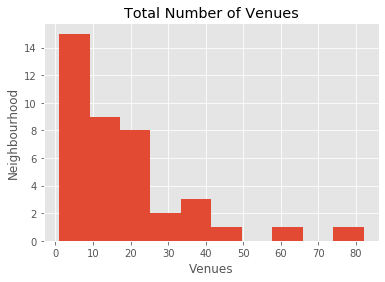

In [20]:
ax = Mumbai_venues.groupby('Neighborhood').count()
ax["Venue"].head(40).plot(kind='hist')
plt.title('Total Number of Venues')
plt.ylabel('Neighbourhood')
plt.xlabel('Venues')
plt.show()

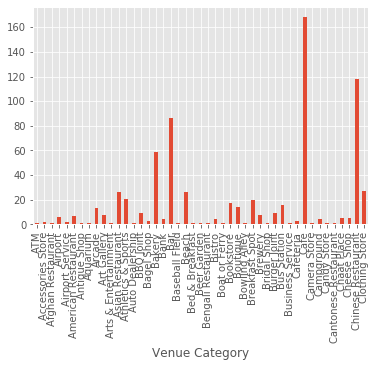

In [21]:
aa= Mumbai_venues.groupby("Venue Category").count()
aa["Venue"].head(45).plot(kind = "bar")
plt.show()

In [22]:
Mumbai_venues[Mumbai_venues["Venue Category"]=="Café"]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
36,Andheri,19.119698,72.846420,Tian ccd,19.116555,72.848106,Café
61,Andheri Railway station,19.119698,72.846420,Tian ccd,19.116555,72.848106,Café
90,B.N. bhavan,18.937132,72.832556,Cafe Excelsior,18.937701,72.833566,Café
108,B.N. bhavan,18.937132,72.832556,Mocambo Café,18.934267,72.833698,Café
125,B.P.lane,18.951606,72.834797,Noorani Milk Centre,18.954749,72.833382,Café
131,Bandra West,19.058336,72.830267,XVII Tea Room,19.059526,72.829247,Café
141,Bandra West,19.058336,72.830267,Pali Village Café,19.062056,72.829506,Café
151,Bandra West,19.058336,72.830267,145 Bandra,19.060330,72.829571,Café
167,Bandra West,19.058336,72.830267,Chéron,19.055254,72.830645,Café
169,Bandra West,19.058336,72.830267,Di Bella Coffee,19.061036,72.832526,Café


In [23]:
print('There are {} uniques categories.'.format(len(Mumbai_venues['Venue Category'].unique())))

There are 201 uniques categories.


In [24]:
Mumbai_venues['Venue Category'].unique()[:100]


array(['Chinese Restaurant', 'Pizza Place', 'Indian Restaurant',
       'Fast Food Restaurant', 'Plaza', 'Bar', 'Sporting Goods Shop',
       'Lounge', 'Electronics Store', 'Bakery', 'Coffee Shop', 'Bank',
       'Athletics & Sports', 'Soccer Field', 'Platform', 'Airport',
       'Airport Service', 'Spa', 'Department Store', "Women's Store",
       'Business Service', 'Sandwich Place', 'Restaurant', 'Food Court',
       'Burger Joint', 'Paper / Office Supplies Store', 'Café', 'Hotel',
       'Shopping Mall', 'Camera Store', 'Gym / Fitness Center', 'Trail',
       'Bus Station', 'Falafel Restaurant', 'Pub', 'Asian Restaurant',
       'Snack Place', 'Vegetarian / Vegan Restaurant', 'Bowling Alley',
       'Gym', 'College Cafeteria', 'Seafood Restaurant', 'Multiplex',
       'Flea Market', 'Train Station', 'History Museum',
       'Middle Eastern Restaurant', 'BBQ Joint', 'Dessert Shop',
       'Ice Cream Shop', 'American Restaurant', 'Convenience Store',
       'Indian Sweet Shop', 'Park

In [25]:
# one hot encoding
M_onehot = pd.get_dummies(Mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
M_onehot['Neighborhood'] = Mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [M_onehot.columns[-1]] + list(M_onehot.columns[:-1])
M_onehot = M_onehot[fixed_columns]

M_onehot.head()

,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Recreation Center,Resort,Rest Area,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
M_grouped = M_onehot.groupby('Neighborhood').mean().reset_index()
M_grouped

,Neighborhood,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Racetrack,Recreation Center,Resort,Rest Area,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,A I staff colony,0.000000,0.00,0.0000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.00,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0

In [27]:
M_onehot.shape

(2786, 201)

In [28]:
M_grouped.shape

(181, 201)

In [29]:
num_top_venues = 5

for hood in M_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = M_grouped[M_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A I staff colony----
                  venue  freq
0     Indian Restaurant   0.2
1           Pizza Place   0.1
2     Electronics Store   0.1
3  Fast Food Restaurant   0.1
4   Sporting Goods Shop   0.1


----Agripada----
                venue  freq
0        Soccer Field  0.17
1            Platform  0.17
2         Coffee Shop  0.17
3                Bank  0.17
4  Athletics & Sports  0.17


----Airport----
             venue  freq
0          Airport   0.6
1  Airport Service   0.2
2              Spa   0.2
3              Zoo   0.0
4      Music Store   0.0


----Ambewadi----
               venue  freq
0      Women's Store  0.25
1  Indian Restaurant  0.25
2   Department Store  0.25
3   Business Service  0.25
4                Zoo  0.00


----Andheri----
                           venue  freq
0              Indian Restaurant  0.25
1           Fast Food Restaurant  0.17
2  Paper / Office Supplies Store  0.08
3                     Food Court  0.08
4                   Burger Joint  0.08


----A

                           venue  freq
0                            Gym   0.2
1  Vegetarian / Vegan Restaurant   0.2
2                    Coffee Shop   0.2
3             Falafel Restaurant   0.2
4                 Sandwich Place   0.2


----Haffkin Institute----
                venue  freq
0           Roof Deck  0.12
1               Hotel  0.12
2   Indian Restaurant  0.12
3         Coffee Shop  0.12
4  Chinese Restaurant  0.12


----Haines Road----
               venue  freq
0  Indian Restaurant  0.33
1        Pizza Place  0.11
2        Fish Market  0.11
3        Coffee Shop  0.11
4       Cupcake Shop  0.11


----Hajiali----
               venue  freq
0  Indian Restaurant  0.21
1        Coffee Shop  0.11
2                Bar  0.11
3         Irani Cafe  0.11
4              Hotel  0.05


----Hanuman Road----
                  venue  freq
0     Indian Restaurant  0.47
1                Market  0.07
2                  Food  0.07
3        Ice Cream Shop  0.07
4  Fast Food Restaurant  0.07


-

               venue  freq
0  Indian Restaurant  0.22
1             Bakery  0.11
2        Bridal Shop  0.11
3      Train Station  0.11
4     Scenic Lookout  0.11


----Marol Bazar----
                           venue  freq
0                    Pizza Place  0.17
1                          Hotel  0.17
2                      Hotel Bar  0.17
3  Vegetarian / Vegan Restaurant  0.08
4              Indian Restaurant  0.08


----Marol Naka----
                  venue  freq
0                 Hotel  0.14
1                  Café  0.10
2     Indian Restaurant  0.10
3            Restaurant  0.10
4  Fast Food Restaurant  0.07


----Masjid----
               venue  freq
0  Indian Restaurant   0.4
1    Harbor / Marina   0.2
2  Convenience Store   0.2
3         Restaurant   0.2
4                Zoo   0.0


----Matunga Railway workshop----
                  venue  freq
0     Indian Restaurant  0.18
1        Ice Cream Shop  0.09
2  Fast Food Restaurant  0.09
3           Snack Place  0.06
4                

               venue  freq
0  Indian Restaurant  0.21
1        Coffee Shop  0.11
2                Bar  0.11
3         Irani Cafe  0.11
4              Hotel  0.05


----V J b udyan----
               venue  freq
0  Indian Restaurant  0.20
1             Bakery  0.13
2                Zoo  0.07
3   Asian Restaurant  0.07
4              Hotel  0.07


----V K bhavan----
                venue  freq
0   Indian Restaurant  0.09
1  Italian Restaurant  0.09
2          Restaurant  0.09
3             Theater  0.09
4            Wine Bar  0.06


----V.P. road----
                  venue  freq
0           Snack Place  0.09
1        Clothing Store  0.09
2              Boutique  0.05
3             Nightclub  0.05
4  Fast Food Restaurant  0.05


----V.W.t.c.----
                venue  freq
0  Chinese Restaurant  0.11
1   Indian Restaurant  0.11
2                 Spa  0.11
3               Hotel  0.05
4    Toy / Game Store  0.05


----Vakola----
                venue  freq
0  Chinese Restaurant  0.50
1  Se

In [35]:
len(M_grouped[M_grouped["Fast Food Restaurant"] > 0])

80

In [37]:
FFR = M_grouped[["Neighborhood","Fast Food Restaurant"]]
FFR

,Neighborhood,Fast Food Restaurant
0,A I staff colony,0.100000
1,Agripada,0.000000
2,Airport,0.000000
3,Ambewadi,0.000000
4,Andheri,0.166667
5,Andheri East,0.076923
6,Andheri Railway station,0.166667
7,Antop Hill,0.000000
8,Asvini,0.000000
9,Azad Nagar,0.000000


In [87]:
# Sorting Function
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = M_grouped['Neighborhood']

for ind in np.arange(M_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(M_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A I staff colony,Indian Restaurant,Fast Food Restaurant,Lounge,Pizza Place,Chinese Restaurant,Plaza,Sporting Goods Shop,Electronics Store,Bar,Dim Sum Restaurant
1,Agripada,Coffee Shop,Athletics & Sports,Platform,Bank,Bakery,Soccer Field,Goan Restaurant,Design Studio,Farm,Falafel Restaurant
2,Airport,Airport,Spa,Airport Service,Yoga Studio,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
3,Ambewadi,Women's Store,Indian Restaurant,Department Store,Business Service,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
4,Andheri,Indian Restaurant,Fast Food Restaurant,Café,Restaurant,Burger Joint,Sandwich Place,Food Court,Bakery,Paper / Office Supplies Store,Gastropub
5,Andheri East,Hotel,Indian Restaurant,Bar,Shopping Mall,Camera Store,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Event Space,Dim Sum Restaurant
6,Andheri Railway station,Indian Restaurant,Fast Food Restaurant,Café,Restaurant,Burger Joint,Sandwich Place,Food Court,Bakery,Paper / Office Supplies Store,Gastropub
7,Antop Hill,Indian Restaurant,Gym / Fitness Center,Trail,Bus Station,Dessert Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant
8,Asvini,Bus Station,Yoga Studio,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
9,Azad Nagar,Bar,Coffee Shop,Snack Place,Pub,Bowling Alley,Athletics & Sports,Asian Restaurant,Burger Joint,Indian Restaurant,Sandwich Place


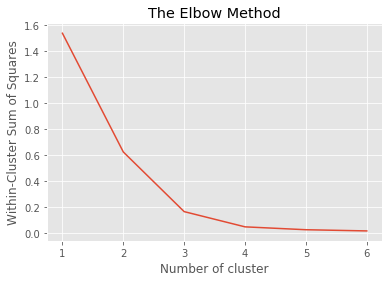

In [103]:
wcss = []
# run k-means clustering
M_grouped_clustering = FFR.drop('Neighborhood', 1)
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=4).fit(M_grouped_clustering)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
# check cluster labels generated for each row in the dataframe
wcss

no_of_cluster = range(1,7)
plt.plot(no_of_cluster,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

In [104]:
# set number of clusters
kclusters = 4
M_grouped_clustering = FFR.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=4).fit(M_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 0, 0, 1, 3, 1, 0, 0, 0])

In [105]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
M_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
M_merged = M_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Location')

M_merged.head()# check the last columns!

,Location,Pincode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A I staff colony,400029,19.151622,72.854981,3.0,Indian Restaurant,Fast Food Restaurant,Lounge,Pizza Place,Chinese Restaurant,Plaza,Sporting Goods Shop,Electronics Store,Bar,Dim Sum Restaurant
2,Aareymilk Colony,400065,19.180136,72.908812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agripada,400011,18.975302,72.824898,0.0,Coffee Shop,Athletics & Sports,Platform,Bank,Bakery,Soccer Field,Goan Restaurant,Design Studio,Farm,Falafel Restaurant
4,Airport,400099,19.090201,72.863808,0.0,Airport,Spa,Airport Service,Yoga Studio,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
5,Ambewadi,400004,19.186776,72.859313,0.0,Women's Store,Indian Restaurant,Department Store,Business Service,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space


In [106]:
M_merged.dropna(subset=["Cluster Labels"], axis =0 , inplace =True)

In [107]:
M_merged.astype({"Cluster Labels": "int32"}).head()

,Location,Pincode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A I staff colony,400029,19.151622,72.854981,3,Indian Restaurant,Fast Food Restaurant,Lounge,Pizza Place,Chinese Restaurant,Plaza,Sporting Goods Shop,Electronics Store,Bar,Dim Sum Restaurant
3,Agripada,400011,18.975302,72.824898,0,Coffee Shop,Athletics & Sports,Platform,Bank,Bakery,Soccer Field,Goan Restaurant,Design Studio,Farm,Falafel Restaurant
4,Airport,400099,19.090201,72.863808,0,Airport,Spa,Airport Service,Yoga Studio,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
5,Ambewadi,400004,19.186776,72.859313,0,Women's Store,Indian Restaurant,Department Store,Business Service,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
6,Andheri,400053,19.119698,72.846420,1,Indian Restaurant,Fast Food Restaurant,Café,Restaurant,Burger Joint,Sandwich Place,Food Court,Bakery,Paper / Office Supplies Store,Gastropub


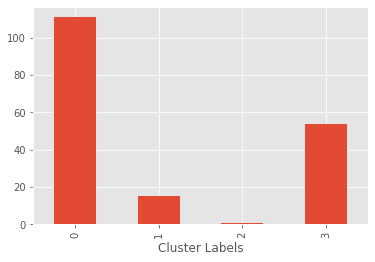

In [108]:
M_merged1 = M_merged.astype({"Cluster Labels": "int32"}).groupby(["Cluster Labels"]).count()
M_merged1["Pincode"].plot(kind = "bar")
plt.show()

In [109]:
# create map
map_clusters = folium.Map(location=[19.0760, 72.8777], zoom_start=10.75)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(M_merged['Latitude'], M_merged['Longitude'], M_merged['Location'], M_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [110]:
M_merged.loc[M_merged['Cluster Labels'] == 0, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,400011,Coffee Shop,Athletics & Sports,Platform,Bank,Bakery,Soccer Field,Goan Restaurant,Design Studio,Farm,Falafel Restaurant
4,400099,Airport,Spa,Airport Service,Yoga Studio,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
5,400004,Women's Store,Indian Restaurant,Department Store,Business Service,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space
9,400037,Indian Restaurant,Gym / Fitness Center,Trail,Bus Station,Dessert Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant
10,400005,Bus Station,Yoga Studio,Dim Sum Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
11,400053,Bar,Coffee Shop,Snack Place,Pub,Bowling Alley,Athletics & Sports,Asian Restaurant,Burger Joint,Indian Restaurant,Sandwich Place
12,400003,Hotel,Yoga Studio,Design Studio,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Donut Shop
13,400051,Indian Restaurant,Coffee Shop,Café,Seafood Restaurant,Bar,Chinese Restaurant,Multiplex,Sandwich Place,Bakery,Athletics & Sports
14,400003,Indian Restaurant,Convenience Store,Chinese Restaurant,BBQ Joint,Dessert Shop,Restaurant,Indian Sweet Shop,Ice Cream Shop,Electronics Store,American Restaurant
15,400050,Indian Restaurant,Café,Chinese Restaurant,Bakery,Asian Restaurant,Pub,Fast Food Restaurant,Bar,Coffee Shop,Gourmet Shop


In [111]:
M_merged.loc[M_merged['Cluster Labels'] == 1, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,400053,Indian Restaurant,Fast Food Restaurant,Café,Restaurant,Burger Joint,Sandwich Place,Food Court,Bakery,Paper / Office Supplies Store,Gastropub
8,400058,Indian Restaurant,Fast Food Restaurant,Café,Restaurant,Burger Joint,Sandwich Place,Food Court,Bakery,Paper / Office Supplies Store,Gastropub
20,400007,Pizza Place,Fast Food Restaurant,Restaurant,Yoga Studio,Design Studio,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
21,400028,Fast Food Restaurant,Restaurant,Clothing Store,Indian Restaurant,Snack Place,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
35,400011,Coffee Shop,Multiplex,Spa,Fast Food Restaurant,Snack Place,Convention Center,Diner,Community Center,Farmers Market,Farm
79,400008,Fast Food Restaurant,Department Store,Hotel,Middle Eastern Restaurant,Dessert Shop,Smoke Shop,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Cricket Ground
100,400006,Park,Gym,Bakery,Fast Food Restaurant,Restaurant,Yoga Studio,Dessert Shop,Farm,Falafel Restaurant,Event Space
138,400002,Indian Restaurant,Fast Food Restaurant,Café,Train Station,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store
140,400097,Asian Restaurant,Train,Fast Food Restaurant,Dessert Shop,Gastropub,Snack Place,Cosmetics Shop,Convention Center,Community Center,Farmers Market
145,400002,Indian Restaurant,Fast Food Restaurant,Café,Train Station,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store


In [112]:
M_merged.loc[M_merged['Cluster Labels'] == 2, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
142,400060,Fast Food Restaurant,Yoga Studio,Dessert Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Donut Shop


In [113]:
M_merged.loc[M_merged['Cluster Labels'] == 3, M_merged.columns[[1] + list(range(5, M_merged.shape[1]))]]

,Pincode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,400029,Indian Restaurant,Fast Food Restaurant,Lounge,Pizza Place,Chinese Restaurant,Plaza,Sporting Goods Shop,Electronics Store,Bar,Dim Sum Restaurant
7,400069,Hotel,Indian Restaurant,Bar,Shopping Mall,Camera Store,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Event Space,Dim Sum Restaurant
27,400020,Fast Food Restaurant,Ice Cream Shop,Hotel,Coffee Shop,Indian Restaurant,Café,Movie Theater,Bookstore,Train Station,Chinese Restaurant
29,400093,Restaurant,Hotel,Multiplex,Fast Food Restaurant,Indian Restaurant,Café,Jewelry Store,Seafood Restaurant,Asian Restaurant,Snack Place
33,400004,Bakery,Ice Cream Shop,Juice Bar,Fast Food Restaurant,Athletics & Sports,Bus Station,Snack Place,Italian Restaurant,Dessert Shop,Indian Restaurant
36,400020,Indian Restaurant,Ice Cream Shop,Hotel,Cricket Ground,Fast Food Restaurant,Café,Movie Theater,Train Station,Chinese Restaurant,Soccer Field
39,400026,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,Racetrack,Café,Bakery,Department Store,Donut Shop,Men's Store,Dessert Shop
41,400014,Indian Restaurant,Coffee Shop,Movie Theater,Café,Fast Food Restaurant,Bar,Convenience Store,Plaza,Restaurant,Breakfast Spot
54,400028,Indian Restaurant,Convenience Store,Coffee Shop,Clothing Store,Chinese Restaurant,Seafood Restaurant,Electronics Store,Fast Food Restaurant,Yoga Studio,Dim Sum Restaurant
55,400062,Indian Restaurant,Fast Food Restaurant,Snack Place,Bar,Restaurant,Bus Station,Mobile Phone Shop,Bookstore,Design Studio,Seafood Restaurant
